In [67]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import numpy as np

In [109]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=3, n_redundant=0, n_informative=2,
                           random_state=2, n_clusters_per_class=1)

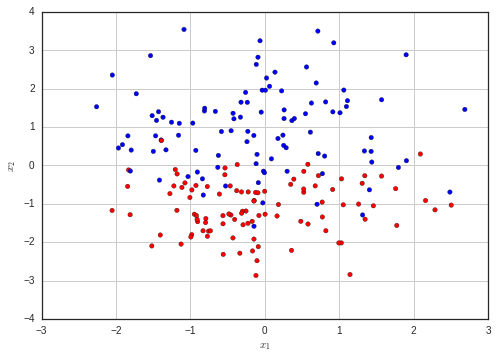

In [110]:
sns.set(style="white")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["#FF0000", "#0000FF"]))
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

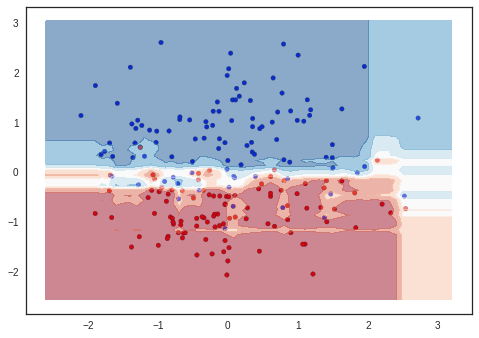

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

h = 0.1

# X_scaled = StandardScaler().fit_transform(X[:, :2])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2)

x_min, x_max = X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5
y_min, y_max = X_scaled[:, 1].min() - .5, X_scaled[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=ListedColormap(["#FF0000", "#0000FF"]))

train_results = dict(
    param = [],
    train_scores = [],
    test_scores = [],
)

for n_estimators in range(100, 200):
    train_results['param'].append(n_estimators)
#     clf = KNeighborsClassifier(n_neighbors, weights='distance').fit(X_train, y_train)
    clf = SVC(C).fit(X_train, y_train)
    clf = RandomForestClassifier(n_estimators, max_depth=5).fit(X_train, y_train)
    train_results['test_scores'].append(1 - clf.score(X_test, y_test))
    train_results['train_scores'].append(1 - clf.score(X_train, y_train))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.5)

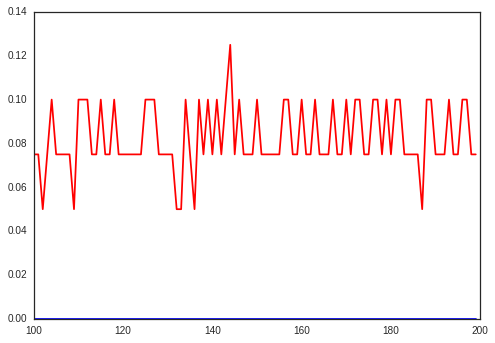

In [122]:
plt.plot(train_results['param'], train_results['train_scores'], c='b')
plt.plot(train_results['param'], train_results['test_scores'], c='r')

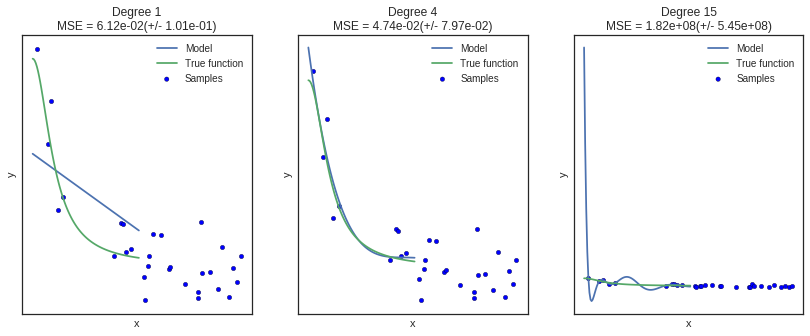

In [184]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

# true_fun = lambda X: np.cos(1.5 * np.pi * X)
true_fun = lambda X: 1/(1 + 25*X**2)
X = np.sort(2*np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1



plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
#     plt.xlim((0, 1))
#     plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

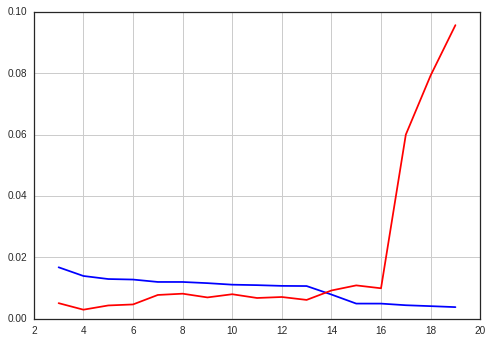

In [185]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = dict(
    degree = [],
    test_mse = [],
    train_mse = []
)

for i in range(3, 20):
    polynomial_features = PolynomialFeatures(degree=i,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)
    
    results['degree'].append(i)
    results['test_mse'].append(mean_squared_error(y_test, pipeline.predict(X_test[:, np.newaxis])))
    results['train_mse'].append(mean_squared_error(y_train, pipeline.predict(X_train[:, np.newaxis])))
plt.plot(results['degree'], results['train_mse'], c='b')
plt.plot(results['degree'], results['test_mse'], c='r')
plt.grid(True)